In [42]:
import numpy as np
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import RMSprop

In [19]:
train_rock_dir="E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/rps/rock"
train_paper_dir="E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/rps/paper"
train_scissor_dir="E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/rps/scissors"

test_rock_dir="E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/rps-test-set/rock"
test_paper_dir="E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/rps-test-set/paper"
test_scissor_dir="E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/rps-test-set/scissors"

In [21]:
train_rock_names= os.listdir(train_rock_dir)
print(train_rock_names[:5])
train_paper_names= os.listdir(train_paper_dir)
print(train_paper_names[:5])
train_scissor_names= os.listdir(train_scissor_dir)
print(train_scissor_names[:5])

print(os.listdir(test_rock_dir)[:5])
print(os.listdir(test_paper_dir)[:5])
print(os.listdir(test_scissor_dir)[:5])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png']
['testrock01-00.png', 'testrock01-01.png', 'testrock01-02.png', 'testrock01-03.png', 'testrock01-04.png']
['testpaper01-00.png', 'testpaper01-01.png', 'testpaper01-02.png', 'testpaper01-03.png', 'testpaper01-04.png']
['testscissors01-00.png', 'testscissors01-01.png', 'testscissors01-02.png', 'testscissors01-03.png', 'testscissors01-04.png']


In [28]:
print("length of train_rock_pics : ",len(train_rock_names))
print("length of train_paper_pics : ",len(train_paper_names))
print("length of train_scissors_pics : ",len(train_scissor_names))

print("\nlenth of test_rock_pics : ",len(os.listdir(test_rock_dir)))
print("lenth of test_paper_pics : ",len(os.listdir(test_paper_dir)))
print("lenth of test_scissors_pics : ",len(os.listdir(test_scissor_dir)))

length of train_rock_pics :  840
length of train_paper_pics :  840
length of train_scissors_pics :  840

lenth of test_rock_pics :  124
lenth of test_paper_pics :  124
lenth of test_scissors_pics :  124


In [36]:
train_datagen= ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode="nearest")

test_datagen= ImageDataGenerator(rescale=1.0/255)

In [58]:
train_data_generator= train_datagen.flow_from_directory("E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/rps",
                                                       target_size=(150,150),
                                                       batch_size=128,
                                                       class_mode="categorical")

test_data_generator= test_datagen.flow_from_directory("E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/rps-test-set",
                                                     target_size=(150,150),
                                                     batch_size=128,
                                                     class_mode="categorical")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [59]:
model= Sequential()
model.add(Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))

model.add(Dense(3,activation="softmax"))

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)       

In [61]:
model.compile(loss="categorical_crossentropy",optimizer=RMSprop(lr=0.001),metrics=["accuracy"])

In [62]:
history= model.fit_generator(train_data_generator,
                             steps_per_epoch=50,
                             epochs=15,
                             validation_data=test_data_generator,
                             validation_steps=50,
                             verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
50/50 [==============================] - 197s 4s/step - loss: 1.1950 - acc: 0.3502 - val_loss: 1.0937 - val_acc: 0.3326
Epoch 2/15
50/50 [==============================] - 137s 3s/step - loss: 1.0601 - acc: 0.4457 - val_loss: 0.9762 - val_acc: 0.5077
Epoch 3/15
50/50 [==============================] - 128s 3s/step - loss: 0.8303 - acc: 0.6278 - val_loss: 0.5282 - val_acc: 0.7924
Epoch 4/15
50/50 [==============================] - 130s 3s/step - loss: 0.5989 - acc: 0.7557 - val_loss: 0.2644 - val_acc: 0.9652
Epoch 5/15
50/50 [==============================] - 128s 3s/step - loss: 0.4035 - acc: 0.8438 - val_loss: 0.2343 - val_acc: 0.9517
Epoch 6/15
50/50 [==============================] - 135s 3s/step - loss: 0.2972 - acc: 0.8902 - val_loss: 0.1229 - val_acc: 0.9705
Epoch 7/15
50/50 [==============================] - 128s 3s/step - loss: 0.2049 - acc: 0.9225 - val_loss: 0.0891 - val_acc: 0.9836
Epoch 8

In [63]:
model.evaluate(test_data_generator,steps=50)

50/50 [==============================] - 29s 576ms/step - loss: 0.1298 - acc: 0.9517


[0.12981187224388122, 0.95167524]

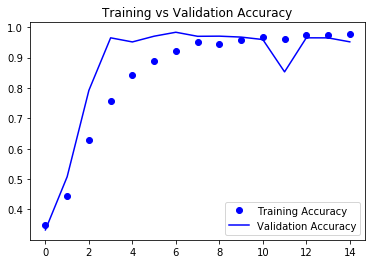

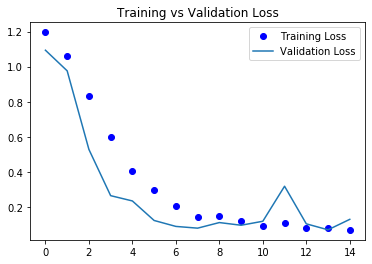

In [72]:
import matplotlib.pyplot as plt
acc= history.history["acc"]
val_acc= history.history["val_acc"]
loss= history.history["loss"]
val_loss= history.history["val_loss"]

epochs=range(len(acc))

plt.plot(epochs,acc,"bo",label="Training Accuracy")
plt.plot(epochs,val_acc,"b",label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,loss,"bo",label="Training Loss")
plt.plot(epochs,val_loss,label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [89]:
from tensorflow.keras.preprocessing import image
import numpy as np

path= "E:/Machine Learning/Machine Learning/Neural Networks/CNN/RockPaperScissor/Test/p3.jpg"
img= image.load_img(path,target_size=(150,150))
x= image.img_to_array(img)
x= np.expand_dims(x,axis=0)

images= np.vstack([x])
classes= model.predict(images,batch_size=10)
print(classes)

#[x,y,z]
#x= Paper
#y= Rock
#z= Scissors

[[1. 0. 0.]]
